In [7]:
import yaml 
import logging 
import sys
from pathlib import Path
import pandas as pd
from src.core.metrics import sharpe_ratio, max_drawdown, cagr, cumulative_return
import matplotlib.pyplot as plt

# Configure logging to show INFO and above
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(name)s - %(levelname)s - %(message)s',
    datefmt='%Y-%m-%d %H:%M:%S',
    force=True  # Override any existing configuration
)

# For Jupyter notebooks: add project root to path
# Navigate from notebook directory (notebook/) to project root
notebook_dir = Path().resolve()
# If we're in notebook/ directory, go up one level to project root
if notebook_dir.name == 'notebook':
    project_root = notebook_dir.parent
else:
    # If running from project root, use current directory
    project_root = notebook_dir

# Add project root to Python path for imports
sys.path.insert(0, str(project_root))


In [2]:
from src.strategy.strategy import Strategy
from src.core.engine import run

# Get project root directory for file paths
config_path = project_root / "configs" / "base.yaml"
with open(config_path, 'r') as file:
    data = yaml.safe_load(file)

data_path = project_root / "data" / "clean" / "NQ_clean.csv"
try:
    df = pd.read_csv(data_path)
    # Log success
    logging.info('Successfully loaded the dataframe.')

except FileNotFoundError:
    logging.error(f'File not found: {data_path}. Cannot load the dataframe.')
except Exception as e:
    logging.error(f'An unexpected error occurred during file loading: {e}')

2025-11-28 10:41:28 - root - INFO - Successfully loaded the dataframe.


In [3]:
strategy = Strategy(data)
logging.info(strategy.get_cfg())

2025-11-28 10:41:28 - root - INFO - {'data': {'raw_NQ': 'data/raw/NQ.csv', 'clean_NQ': 'data/clean/NQ_clean.csv', 'clean_ES': 'data/clean/ES_clean.csv', 'clean_EMD': 'data/clean/EMD_clean.csv', 'clean_YM': 'data/clean/YM_clean.csv'}, 'indicators': {'rsi_period': 2, 'hurst_window': 20, 'short_composite_rsi': 2, 'long_composite_rsi': 24}, 'entry_thresholds': {'rsi_low': 10.0, 'rsi_high': 20.0, 'hurst_threshold': 0.5}, 'exits': {'max_time_exit': False, 'max_time': 11, 'take_profit': False, 'max_profitable_closes': 5, 'RSI_exit': False, 'max_bars_in_trade': False, 'composite_rsi_threshold': 0.5}, 'ablation': {'use_rsi': True, 'use_hurst': True, 'use_time_exit': True, 'use_RSI_exit': True, 'use_take_profit': True}}


In [ ]:
all_trades = run(df, strategy)  
print(f"Completed {len(all_trades)} trades")
print(all_trades)




2025-11-28 10:41:38 - root - INFO - NO ENTRY: RSI indicators was NOT between 10 ad 20.
2025-11-28 10:41:38 - root - INFO - NO ENTRY: Hurst filter is NOT above the threshold.
2025-11-28 10:41:38 - root - INFO - NO ENTRY: RSI indicators was NOT between 10 ad 20.
2025-11-28 10:41:38 - root - INFO - NO ENTRY: Hurst filter is NOT above the threshold.
2025-11-28 10:41:38 - root - INFO - NO ENTRY: RSI indicators was NOT between 10 ad 20.
2025-11-28 10:41:38 - root - INFO - NO ENTRY: Hurst filter is NOT above the threshold.
2025-11-28 10:41:38 - root - INFO - NO ENTRY: Hurst filter is NOT above the threshold.
2025-11-28 10:41:38 - root - INFO - NO ENTRY: RSI indicators was NOT between 10 ad 20.
2025-11-28 10:41:38 - root - INFO - NO ENTRY: Hurst filter is NOT above the threshold.
2025-11-28 10:41:38 - root - INFO - NO ENTRY: RSI indicators was NOT between 10 ad 20.
2025-11-28 10:41:38 - root - INFO - NO ENTRY: Hurst filter is NOT above the threshold.
2025-11-28 10:41:38 - root - INFO - NO ENTR

Completed 78 trades
[{'open_date': 157, 'entry_price': np.float64(1816.5), 'bars': 2, 'close_date': 159, 'sell_price': np.float64(1776.0), 'profit': np.float64(-0.022295623451692816)}, {'open_date': 183, 'entry_price': np.float64(1799.0), 'bars': 2, 'close_date': 185, 'sell_price': np.float64(1839.5), 'profit': np.float64(0.022512506948304613)}, {'open_date': 222, 'entry_price': np.float64(1640.0), 'bars': 2, 'close_date': 224, 'sell_price': np.float64(1668.5), 'profit': np.float64(0.017378048780487806)}, {'open_date': 237, 'entry_price': np.float64(1578.0), 'bars': 2, 'close_date': 239, 'sell_price': np.float64(1593.0), 'profit': np.float64(0.009505703422053232)}, {'open_date': 282, 'entry_price': np.float64(1311.5), 'bars': 2, 'close_date': 284, 'sell_price': np.float64(1347.0), 'profit': np.float64(0.02706824247045368)}, {'open_date': 714, 'entry_price': np.float64(1233.0), 'bars': 2, 'close_date': 716, 'sell_price': np.float64(1236.0), 'profit': np.float64(0.0024330900243309003)}, 

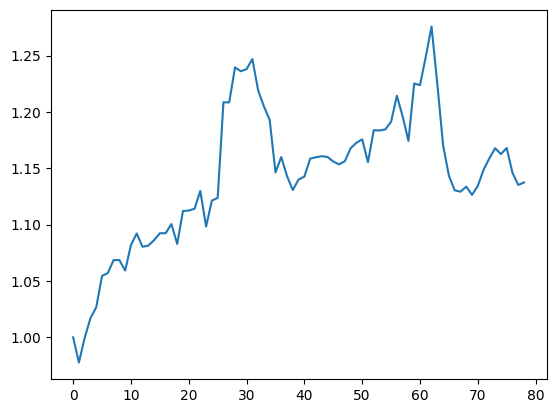

2025-11-28 17:08:56 - root - INFO - 
 sharpe ratio -> 1.606915
2025-11-28 17:08:56 - root - INFO - 
 max drawdown -> -0.117125


In [11]:
returns = pd.Series((t["profit"] for t in all_trades)).dropna()

sharpe = sharpe_ratio(returns)
equity_curve = cumulative_return(returns)
max_dd = max_drawdown(equity_curve)
plt.plot(equity_curve)
plt.show()

logging.info("\n sharpe ratio -> %f", sharpe)
logging.info("\n max drawdown -> %f", max_dd)